# Assignment 1

__*m12001643 Ilyes Justin <br>
m11804717 Seidl Stefan <br>
m Wagemaier Daniel*__ <br>

## 1) Import Librarys, data and create test and training sets

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
import sklearn.model_selection as skms
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [10, 5] #change inline figure size [width, higth]

df = pd.read_csv("alldigits.csv")
data = df.to_numpy()

X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

total_points_testSet = len(y_test)

## 2) Plotting the Images

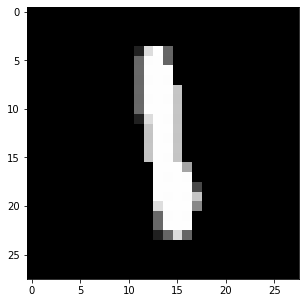

In [2]:
pictures = []
for row in data:
    single_picture_matrix = []
    for i in range(28):
        innerList = []
        for j in range(28):
            innerList.append(int(row[j * 28 + i]))
        single_picture_matrix.append(innerList)
    pictures.append(single_picture_matrix)


n = 200    
plt.imshow(pictures[n], cmap='Greys_r', vmin=0, vmax=255)
plt.show() 

# 3) Analyse the Data

Points in Trainset: 3000
Points in Testset: 3000
Test/Train Ratio: 1.0


Text(0.5, 0, 'Numbers')

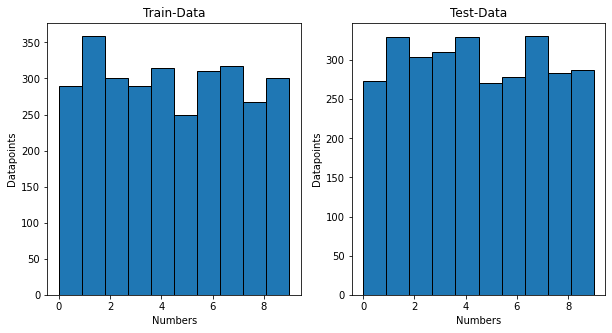

In [3]:
print("Points in Trainset: " + str(len(y_train)))
print("Points in Testset: " + str(len(y_test)))
print("Test/Train Ratio: " + str(len(y_test)/len(y_train)))

plt.figure(1)
plt.align = "mid"
plt.subplot(121)
plt.hist(y_train,10,edgecolor="black")
plt.title("Train-Data")
plt.xlabel("Numbers")
plt.ylabel("Datapoints")
plt.subplot(122)
plt.hist(y_test,10,edgecolor="black")
plt.title("Test-Data")
plt.ylabel("Datapoints")
plt.xlabel("Numbers")



# 4) Decision Tree

In [28]:
DTC = tree.DecisionTreeClassifier() # creates the decision tree classifier (default = "gini")
DTC.fit(X_train, y_train) # trains the model
predicted = DTC.predict(X_test) # classifies/predicts incoming test data

dtc_correct_labeled = (y_test == predicted).sum()
print("Correct labeled(Decision Tree): " + str(dtc_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((dtc_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Decision Tree): 2201 from 3000 (73.36666666666667%)


In [16]:
print(
    f"Classification report of DecisionTreeClassifier():\n"
    f"{classification_report(y_test, predicted, digits=3)}\n"
)

Classification report of DecisionTreeClassifier():
              precision    recall  f1-score   support

           0      0.826     0.832     0.829       274
           1      0.832     0.888     0.859       330
           2      0.734     0.671     0.701       304
           3      0.650     0.690     0.670       310
           4      0.744     0.791     0.767       330
           5      0.668     0.631     0.649       271
           6      0.762     0.727     0.744       278
           7      0.769     0.776     0.773       331
           8      0.645     0.588     0.615       284
           9      0.677     0.705     0.690       288

    accuracy                          0.733      3000
   macro avg      0.731     0.730     0.730      3000
weighted avg      0.732     0.733     0.732      3000




<span style="font-size:15px;"> **Precision**: <span style="font-size:13px;"> percentage of correct predictions <br />
<span style="font-size:15px;"> **Recall**: <span style="font-size:13px;"> percentage of positive cases found <br />
<span style="font-size:15px;"> **F1 score**: <span style="font-size:13px;"> measure of a test's accuracy (relies solely on precision and recall) <br />
<span style="font-size:15px;"> **Accuracy**: <span style="font-size:13px;"> mean of F1 Score <br />
<span style="font-size:15px;"> **Macro Average**: <span style="font-size:13px;"> unweighted mean for all labels <br />
<span style="font-size:15px;"> **Weighted Average**: <span style="font-size:13px;"> weighted mean based off of support from each label <br />
<br />
<span style="font-size:15px;"> $$ Precision = {True Positive \over (True Positive + False Positive)} $$  <br />
<span style="font-size:15px;"> $$ Recall = {True Positive \over (True Positive + False Negative)} $$  <br />
<span style="font-size:15px;"> $$ F1 score = {2*(Precision*Recall) \over (Precision+Recall)} $$

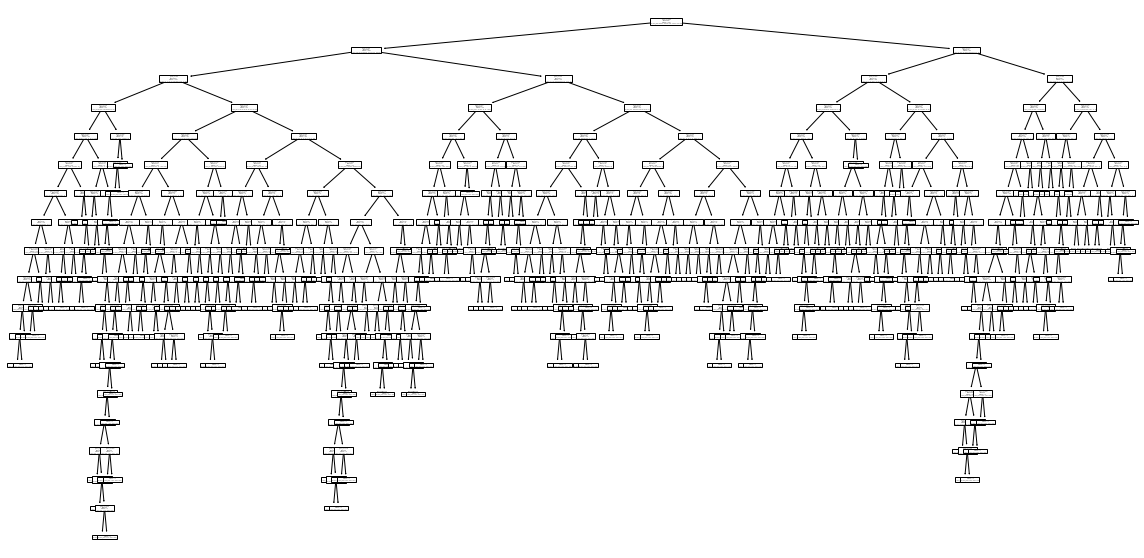

In [6]:
plt.rcParams['figure.figsize'] = [20, 10] #change inline figure size [width, higth]
tree.plot_tree(DTC)
plt.show() # visualizes the decision tree

# 5) Naive Bayes

## 5.1) Gaussian 


In [12]:
gnb = GaussianNB()
y_pred_gauss = gnb.fit(X_train, y_train).predict(X_test)
gauss_correct_labeled = (y_test == y_pred_gauss).sum()
print("Correct labeled(Gauss): " + str(gauss_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((gauss_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Gauss): 1671 from 3000 (55.7%)


## 5.2) Multinominal

In [13]:
mNB = MultinomialNB()
y_pred_multi = mNB.fit(X_train, y_train).predict(X_test)
multi_correct_labeled = (y_test == y_pred_multi).sum()
print("Correct labeled(Multinominal): " + str(multi_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((multi_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Multinominal): 2465 from 3000 (82.16666666666667%)


## 5.3) Complement

In [9]:
cNB = ComplementNB()
y_pred_comp = cNB.fit(X_train, y_train).predict(X_test)
comp_correct_labeled = (y_test == y_pred_comp).sum()
print("Correct labeled(Complement): " + str(comp_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((comp_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Complement): 2119 from 3000 (70.63333333333334%)


## 5.4) Bernoulli

In [10]:
bNB = BernoulliNB()
y_pred_ber = bNB.fit(X_train, y_train).predict(X_test)
ber_correct_labeled = (y_test == y_pred_ber).sum()
print("Correct labeled(Bernoulli): " + str(ber_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((ber_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Bernoulli): 2479 from 3000 (82.63333333333334%)


## 5.5) Categorical

In [11]:
catNB = CategoricalNB(min_categories=256)
y_pred_cat = catNB.fit(X_train, y_train).predict(X_test)
cat_correct_labeled = (y_test == y_pred_cat).sum()
print("Correct labeled(Categorical): " + str(cat_correct_labeled) + " from " + \
      str(total_points_testSet) + " (" + str((cat_correct_labeled/total_points_testSet)*100) +"%)")

Correct labeled(Categorical): 1719 from 3000 (57.3%)


## 5.6) Summary

*RNG_Seed = 0*

|test_size|Gaussian|Multinominal|Complement|Bernoulli|Categorical|Decision Tree|
|---|---|---|---|---|---|---|
|0.1|57.33|82.83|70.17|84.17|67.17|81.33|
|0.3|56.28|82.67|70.22|83.83|62.56|76.17|
|0.5|55.7|82.17|70.63|82.63|57.3|73.07|
|0.7|56.12|82.26|70.95|81.95|48.74|71.29|
|0.9|58.94|81.7|70.48|81.0|30.48|62.78|